In [2]:
import numpy as np
from scipy.stats import bernoulli, norm, poisson, uniform

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

In [168]:
Uniform = uniform(0,1)
Poisson = poisson(5)

In [169]:
Distribution = Poisson
#Distribution = Uniform

x = Distribution.rvs(100)
x_min, x_max, x_mean, x_std = x.min(), x.max(), x.mean(), x.std()

m:4.79
s:2.32


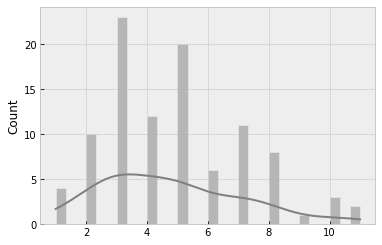

In [192]:
plt.figure()
print(f'm:{x_mean}')
print(f's:{x_std:.2f}')
sns.histplot(x, bins=30, kde=True, color='gray')
plt.show()

In [204]:
experiments = 4
n_means = 50

sample_size = 1 #### n
incement = 20

meta_means = []
experiment_size = []
experiment_samples = []
for i in range(experiments):
    experiment_means = []
    for j in range(n_means):
        sample = Distribution.rvs(sample_size) # DISTRIBUTION
        m = np.mean(sample)
        
        experiment_means.append(m)

    experiment_size.append(sample_size)
    sample_size = sample_size + step
    meta_means.append(experiment_means)
    

meta_means = np.array(meta_means)

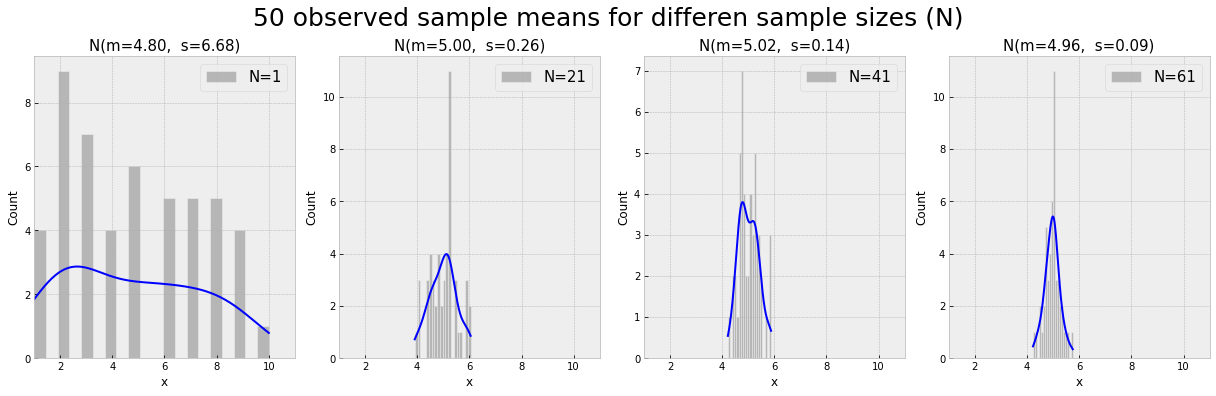

In [213]:
fig = plt.figure(figsize=(17,10))

for i , experiment in enumerate(meta_means):
    #experiment = experiment_means[:exp]
    n = experiment_size[i]
    m, v, s = np.mean(experiment), np.std(experiment), np.var(experiment)
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.set_title(f'N(m={m:.2f},  s={s:.2f})', fontsize=15)
    sns.histplot(experiment, bins=20, kde=True, color='gray', ax=ax, label=f'N={n}')
    ax.lines[0].set_color('blue')
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel(f'x')
    ax.legend(fontsize=15)
    
plt.suptitle(f'{n_means} observed sample means for differen sample sizes (N)', fontsize=25)
plt.tight_layout()
plt.show()